In [5]:
import sys
sys.path.append('../')

from keras_segmentation.pretrained import pspnet_50_ADE_20K , pspnet_101_cityscapes, pspnet_101_voc12
from video_utils import CatVideo
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Anytime we import yolo_training, we can expect this to take a while, since it's loading
# up the yolo model
from yolo_training.Detector import detect_raw_image


In [56]:
# Citation: this builds off of the code outlined in: 
# https://github.com/divamgupta/image-segmentation-keras/blob/master/keras_segmentation/predict.py

# Hard coding the number assigned to the cat category in this dataset
CAT_CLASS = 8

model = pspnet_101_voc12()

In [58]:
# Load the pretrained model trained on Pascal VOC 2012 dataset. We chose this one because it 
# is trained on a variety of objects to detect.

test_frame = CatVideo("../videos/cat3.mp4").get_frame_time(0)

out = model.predict_segmentation(
    inp=test_frame,
    out_fname="test_output/segmentation_test.png"
)

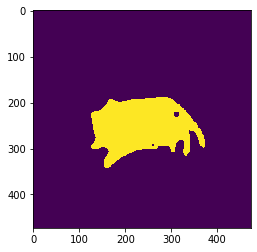

In [59]:
# This is the detected cat
plt.imshow(out)

In [3]:
# cv2.resize(out, (test_frame.shape[0], test_frame.shape[1]))

error: OpenCV(4.2.0) /Users/travis/build/skvark/opencv-python/opencv/modules/imgproc/src/resize.cpp:3923: error: (-215:Assertion failed) func != 0 in function 'resize'


In [60]:
resized_test_image = cv2.resize(test_frame, (out.shape))

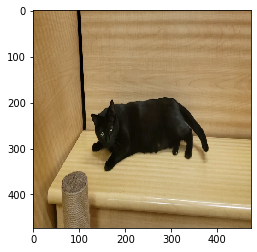

In [61]:
# Since the output of predict_segmentation() is not the same dimensions as the input image, we're reshaping it
# so taht they match. Our goal is to map the center pixel where the cat head appears on to the prediction output
# to identify the pixel of the cat, and grab 
plt.imshow(resized_test_image)

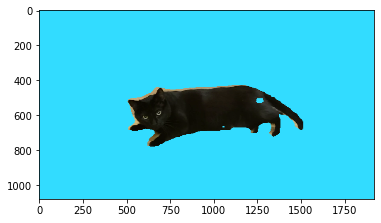

In [62]:
# Reshape so we can easily broadcast in the next step
out_reshaped = out.reshape((473, 473, 1))
background_subtracted = np.where(out_reshaped == 8, resized_test_image, (50, 220, 255))
final_image = cv2.resize(background_subtracted.astype("uint8"), (test_frame.shape[1], test_frame.shape[0]))

# TODO: write algorithm to shrink the outline; if "8" appears next to a 0, remove it
# Also, any non-zeros fully encased in an 8 should convert to an 8
# Use this to also figure out where to crop the image as well
# We could also use this as a feature: how many eights to the rest of the, and where the 8s fall.
plt.imshow(final_image)

In [63]:
test_frame.shape

(1080, 1920, 3)

In [64]:
print(out_reshaped.shape)

(473, 473, 1)


In [65]:
type(test_frame[0][0][0])
# type(background_subtracted[0,0,0])

numpy.uint8